In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

%matplotlib inline

# p(t) - cubic Bezier curve between two 3D points

In [2]:
def p(t, c0, c1, c2, c3):
    t0 = (1 - t)**3
    t1 = 3 * t * (1 - t)**2
    t2 = 3 * (t**2) * (1 - t)
    t3 = t**3
    # print(t0, t1, t2, t3)
    return t0*c0 + t1*c1 + t2*c2 + t3*c3

[0 0 0] [1.66666667 0.         0.        ] [1.33333333 2.         0.        ] [3 2 0]


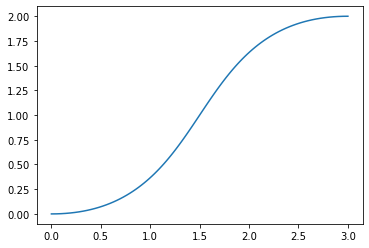

In [5]:
k = 3
b = 2
d0_multiplier = 5
d1_multiplier = 5
p0 = np.array([0, 0, 0])
p1 = np.array([k, b, 0])
d0 = d0_multiplier * np.array([1, 0, 0])
d1 = d1_multiplier * np.array([1, 0, 0])

c0 = p0
c1 = p0 + d0 / 3.
c2 = p1 - d1 / 3.
c3 = p1

tt = np.linspace(0, 1, 101)
pt = np.array([p(t, c0, c1, c2, c3) for t in tt])

fig, ax = plt.subplots()
ax.set_aspect(aspect=1)
# ax.scatter(pt[:, 0], pt[:, 1])
ax.plot(pt[:, 0], pt[:, 1]);

# Derivative of p(t)

In [9]:
t = sp.Symbol('t')
c_0, c_1, c_2, c_3 = sp.symbols("c_0,c_1,c_2,c_3")
c_0

c_0

In [10]:
sp.diff(c_0*(1 - t)**3 + c_1 * 3 * t * (1 - t)**2 + c_2 * 3 * (t**2) * (1 - t) + c_3 * t**3, t)

-3*c_0*(1 - t)**2 + 3*c_1*t*(2*t - 2) + 3*c_1*(1 - t)**2 - 3*c_2*t**2 + 6*c_2*t*(1 - t) + 3*c_3*t**2

In [11]:
def dp(t, c0, c1, c2, c3):
    a0 = -3 * c0 * (1 - t)**2
    a1 = 3 * c1 * (t * (2*t - 2) + (1 - t)**2)
    a2 = 3 * c2 * (-1 * t**2 + 2 * t * (1 - t))
    a3 = 3 * c3 * t**2
    return a0 + a1 + a2 + a3

In [15]:
dp(0.5, c0, c1, c2, c3)

array([2., 3., 0.])

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect(aspect=1)
# ax.scatter(pt[:, 0], pt[:, 1])
ax.plot(pt[:, 0], pt[:, 1]);
# ax.quiver()

[Rotation of a vector (Python)](https://stackoverflow.com/questions/48265646/rotation-of-a-vector-python)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib    
def rotve(v,erot,angle):
    rotmeasure=np.linalg.norm(erot)
    erot=erot/rotmeasure;
    norme=np.dot(v,erot)
    vplane=v-norme*erot
    plnorm=np.linalg.norm(vplane)
    ep=vplane/plnorm
    eo=np.cross(erot,ep)
    vrot=(np.cos(angle)*ep+np.sin(angle)*eo)*plnorm+norme*erot
    return(vrot)


/var/folders/tv/5t3f3sm57dq1rdrd6cnz0j8h0000gp/T/ipykernel_31546/2572335822.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


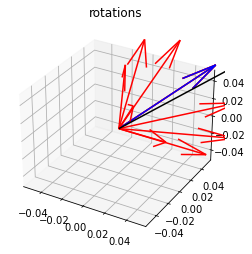

In [17]:
axrot=np.array([1,0,1]); v=np.array([1.,1.,1.])
fig3 = plt.figure(3)
ax3d = fig3.add_subplot(111, projection='3d')
ax3d.quiver(0,0,0,axrot[0],axrot[1],axrot[2],length=.5, normalize=True, color='black')

angles=np.linspace(0,2,10)*np.pi
for i in range(len(angles)):
    vrot=rotve(v,axrot,angles[i]);
    ax3d.quiver(0,0,0,vrot[0],vrot[1],vrot[2],length=.1, normalize=True, color='red')
ax3d.quiver(0,0,0,v[0],v[1],v[2],length=.1, normalize=True, color='blue')
ax3d.set_title('rotations')
fig3.show()
plt.show()